Загружаем датасет

In [34]:
import kagglehub
import pandas as pd
import seaborn as sns

dataset_path = kagglehub.dataset_download("sameelie/resume-hh")
df = pd.read_csv(f'{dataset_path}/hh_ru.csv', sep=';')
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

Предобработка

In [47]:
import re
import math
from pandas.api.types import is_numeric_dtype

# Делим колонку 'Пол, возраст' на две и переводим в числовые колонки 
# М - 1
# Ж - 0
if df.columns.__contains__('Пол, возраст'):
    sex_age_col = df['Пол, возраст'].values
    sex_col = []
    age_col = []
    for row in sex_age_col:
        sex = row.split(',')[0].strip()
        sex_col.append(int(sex.startswith('М')))
        age = re.findall('\d+', row.split(',')[1])[0]
        age_col.append(int(age))
    df['Пол'] = sex_col
    df['Возраст'] = age_col
    df = df.drop(columns=['Пол, возраст'])

# Превращаем колонку 'ЗП' в числовую
if not is_numeric_dtype(df['ЗП']):
    salary_col = df['ЗП'].values
    df['ЗП'] = [int(re.findall('\d+', val)[0]) for val in salary_col]

# Превращаем колонку 'Авто' в числовую
# Имеется собственный автомобиль -> 1
# Не указано -> 0
if not is_numeric_dtype(df['Авто']):
    is_car_exists_col = df['Авто'].values
    df['Авто'] = [int(val.strip().startswith('Имеется')) for val in is_car_exists_col]

# Разбиваем колонку 'Город, переезд, командировки' на три
if df.columns.__contains__('Город, переезд, командировки'):
    city_moving_trips_col = df['Город, переезд, командировки'].values
    city_col = []
    moving_col = []
    trip_col = []

    for row in city_moving_trips_col:
        city_col.append(row.split(',')[0].strip())
        moving_col.append(int(re.search(r'не готов(?:а)? к переезду', row) is None))
        trip_col.append(int(re.search(r'не готов(?:а)? к командировкам', row) is None))
    df['Город'] = city_col
    df['Переезд'] = moving_col
    df['Командировки'] = trip_col
    df = df.drop(columns=['Город, переезд, командировки'])

# Разбиваем колонку 'Занятость' на несколько: 'волонтерство', 'полная занятость', 
# 'проектная работа', 'стажировка', 'частичная занятость'
if df.columns.__contains__('Занятость'):
    work_type_col = df['Занятость'].values
    new_cols = {
        'Волонтерство': [],
        'Полная занятость': [],
        'Проектная работа': [],
        'Стажировка': [],
        'Частичная занятость': []
    }

    for row in work_type_col:
        for col in new_cols.keys():
            is_col_exists = row.find(col.lower()) >= 0
            new_cols[col].append(int(is_col_exists))
    for col in new_cols:
        df[col] = new_cols[col]
    df = df.drop(columns=['Занятость'])

# Превращаем колонку 'Опыт работы' в числовую
if not is_numeric_dtype(df['Опыт работы']):
    work_experience_col = df['Опыт работы'].values
    work_experience_month_col = []

    # regex patterns
    year_pattern = r'Опыт работы (\d+) (?:год(?:а)?|лет).*'
    month_pattern = r'Опыт работы(?: \d+ (?:год(?:а)?|лет))? (\d+) месяц(?:а|ев)?.*'

    for row in work_experience_col:
        exp = 0
        if not(type(row).__name__ == 'float' and math.isnan(row)):
            matcher = re.compile(year_pattern, flags=re.IGNORECASE)
            match_val = matcher.match(row)
            if match_val: # год
                exp += (int(match_val.group(1)) * 12)
            
            matcher = re.compile(month_pattern, flags=re.IGNORECASE)
            match_val = matcher.match(row)
            if match_val: # месяц
                exp += int(match_val.group(1))
        work_experience_month_col.append(exp)
    df['Опыт работы'] = work_experience_month_col

# Превращаем колонку 'График' в числовую
if df.columns.__contains__('График'):
    work_schedule_col = df['График'].values
    work_schedule_type_col = {
        'Вахтовый метод': [],
        'Гибкий график': [],
        'Полный день': [],
        'Сменный график': [],
        'Удаленная работа': []
    }

    for row in work_schedule_col:
        for col in work_schedule_type_col.keys():
            is_col_exists = row.find(col.lower()) >= 0
            work_schedule_type_col[col].append(is_col_exists)
    for col in work_schedule_type_col.keys():
        df[col] = work_schedule_type_col[col]
    df = df.drop(columns=['График'])


In [48]:
import seaborn as sns

df.info()
df.corr(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
Index: 44670 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44670 non-null  int64 
 1   Ищет работу на должность:        44670 non-null  object
 2   Опыт работы                      44670 non-null  int64 
 3   Последнее/нынешнее место работы  44669 non-null  object
 4   Последняя/нынешняя должность     44668 non-null  object
 5   Образование и ВУЗ                44670 non-null  object
 6   Обновление резюме                44670 non-null  object
 7   Авто                             44670 non-null  int64 
 8   Пол                              44670 non-null  int64 
 9   Возраст                          44670 non-null  int64 
 10  Город                            44670 non-null  object
 11  Переезд                          44670 non-null  int64 
 12  Командировки                     4467

,ЗП,Опыт работы,Авто,Пол,Возраст,Переезд,Командировки,Волонтерство,Полная занятость,Проектная работа,Стажировка,Частичная занятость,Вахтовый метод,Гибкий график,Полный день,Сменный график,Удаленная работа
ЗП,1.000000,0.138037,0.016881,0.063714,0.096164,0.066775,0.108512,0.003018,0.052063,0.018483,-0.059595,-0.045352,0.007711,-0.016973,0.064525,-0.084471,-0.012063
Опыт работы,0.138037,1.000000,0.125027,0.092069,0.840910,0.001460,0.139278,-0.022643,0.028199,0.013396,-0.125531,-0.014114,0.027223,-0.031239,0.048832,-0.054797,-0.012461
Авто,0.016881,0.125027,1.000000,0.136491,0.086904,0.030009,0.074163,-0.005430,0.019143,-0.008057,-0.035824,-0.000314,0.037924,0.008408,0.035551,0.019014,-0.003477
Пол,0.063714,0.092069,0.136491,1.000000,0.083541,0.091651,0.092851,0.020642,0.041118,0.043681,0.023410,0.026343,0.091983,0.046807,0.081281,0.067371,0.026473
Возраст,0.096164,0.840910,0.086904,0.083541,1.000000,-0.029827,0.084760,-0.017626,0.025040,0.012371,-0.119891,-0.012713,0.022848,-0.048864,0.034534,-0.065740,-0.019787
Переезд,0.066775,0.001460,0.030009,0.091651,-0.029827,1.000000,0.304961,0.054699,0.066055,0.122182,0.057284,0.070595,0.186706,0.106407,0.069641,0.086019,0.109199
Командировки,0.108512,0.139278,0.074163,0.092851,0.084760,0.304961,1.000000,0.022421,0.102765,0.076118,0.002991,0.025066,0.102566,0.087946,0.118342,0.066427,0.053067
Волонтерство,0.003018,-0.022643,-0.005430,0.020642,-0.017626,0.054699,0.022421,1.000000,-0.020914,0.195481,0.318945,0.153119,0.178848,0.120658,-0.029462,0.122649,0.127751
Полная занятость,0.052063,0.028199,0.019143,0.041118,0.025040,0.066055,0.102765,-0.020914,1.000000,-0.157785,-0.062905,-0.271599,0.024513,-0.131505,0.597024,0.002502,-0.187000
Проектная работа,0.018483,0.013396,-0.008057,0.043681,0.012371,0.122182,0.076118,0.195481,-0.157785,1.000000,0.271721,0.584688,0.202843,0.461370,-0.158010,0.304785,0.490532


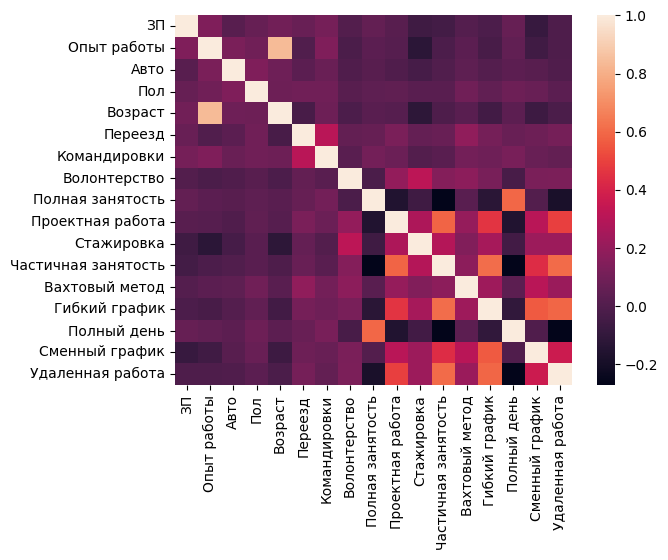

In [49]:
sns.heatmap(df.corr(numeric_only=True))

# Наибольшая зависимость
DEPENDENT_X = 'Опыт работы'
DEPENDENT_Y = 'Возраст'

Смотрим выбросы

<Axes: xlabel='Опыт работы', ylabel='Возраст'>

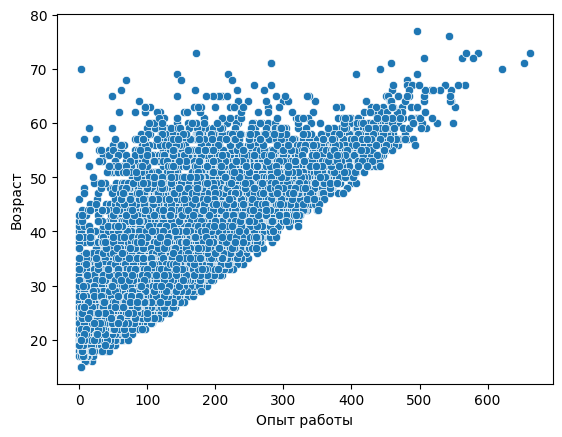

In [50]:
sns.scatterplot(x=DEPENDENT_X,y=DEPENDENT_Y,data=df)

Избавляемся от выбросов

In [51]:
df[df['Возраст'] < 18]

drop_idx = []
min_work_age = 14 # по ТК РФ
c = 0
for idx, row in df.iterrows():
    if row['Возраст'] < min_work_age:
        drop_idx.append(idx)
    elif row['Возраст'] == min_work_age and row['Опыт работы'] > 11:
        drop_idx.append(idx)
    elif (row['Возраст'] - min_work_age) * 12 < row['Опыт работы']:
        drop_idx.append(idx)
    elif row['Возраст'] > 80:
        drop_idx.append(idx)
df = df.drop(drop_idx)

<Axes: xlabel='Опыт работы', ylabel='Возраст'>

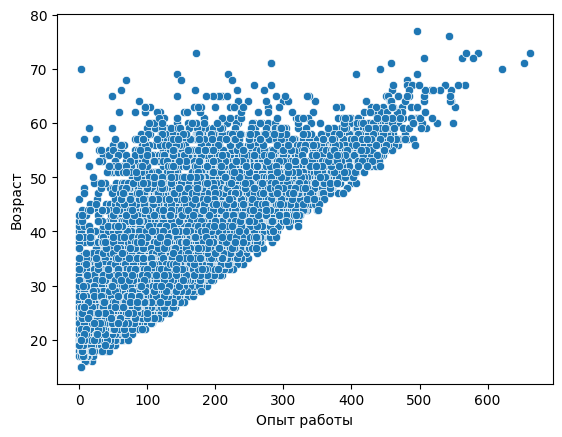

In [52]:
sns.scatterplot(x=DEPENDENT_X,y=DEPENDENT_Y,data=df)